# Time Series Week 3 - Assignment

## 1. Decomposing Stock Time Series Data

### 1.1. Using yfinance to Collect 3 Years of Data
**Task:** Collect stock price data for the past 3 years using the yfinance library.


In [100]:
# pip install yfinance
!pip install yfinance


In [101]:
# Choose a stock symbol (e.g., GOOGL, Tesla or any stock of your choice not AAPL).
# Use the yfinance library to download the historical stock data for the past 3 years.

# Retrieve daily data including columns for Date, Open, High, Low, Close, and Volume.
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
import pandas as pd
import yfinance as yf

start_date = '2021-09-01'
end_date = '2024-09-25'

tsla = yf.download('TSLA', start= start_date, end = end_date)
tsla_original = tsla

tsla.head()



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,244.693329,247.330002,243.756668,244.696671,244.696671,39612900
2021-09-02,244.833328,246.990005,243.513336,244.130005,244.130005,38331900
2021-09-03,244.083328,244.666672,241.399994,244.523331,244.523331,45738300
2021-09-07,246.666672,253.399994,246.419998,250.973328,250.973328,60119400
2021-09-08,253.860001,254.816666,246.923340,251.289993,251.289993,56379000


### 1.2. Visualize Raw Stock Time Series Data
**Task:** Create a line plot to visualize the raw stock time series data.

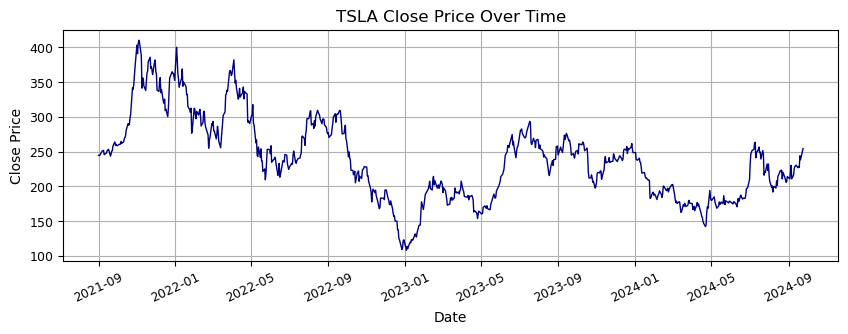

In [102]:
# Load the stock data and visualize the one of the features(can be either Open, High, Low or Close) price over time.
# Customize the plot by adding titles, labels, and date formatting.

plt.figure(figsize=(10, 3))
tsla.reset_index(inplace = True)
tsla = tsla[['Date','Close']]

import matplotlib.pyplot as plt
plt.plot(tsla['Date'], tsla['Close'], color = 'navy', linewidth = 1)
plt.title('TSLA Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.xticks(rotation=25,fontsize=9)
plt.yticks(fontsize=9)

plt.grid(True)


plt.show()


### 1.3. Decompose the Raw Time Series Data
**Task:** Decompose the time series data into trend, seasonal, and residual components using statsmodels.

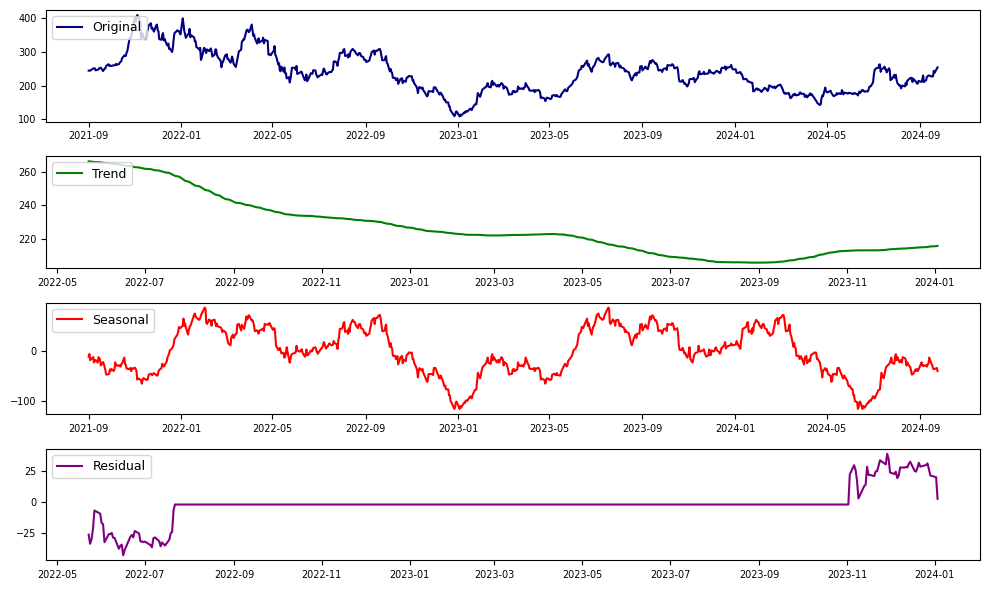

In [103]:
# Perform decomposition on the Close price to extract the trend, seasonal, and residual components.

from statsmodels.tsa.seasonal import seasonal_decompose

tsla.set_index('Date',drop=True,inplace=True)
result = seasonal_decompose(tsla, model='additive', period=365)

# Plot the decomposed components in separate subplots.
plt.figure(figsize=(10, 6))

# Plot original data
plt.subplot(4, 1, 1)
plt.plot(tsla, label='Original', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Trend plots
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='green')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Seasonality plots
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Residuals Plot
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='purple')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.show()


## 2. Trend Analysis Using Data

### 2.1. Exploratory Data Analysis (EDA)
**Task:** Perform EDA to understand the distribution and trends in the stock data.

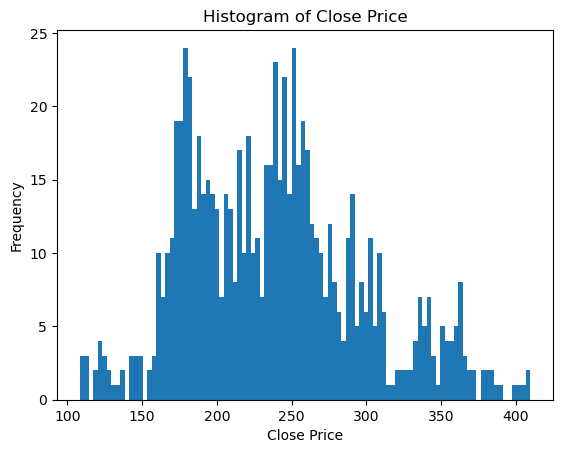

In [104]:
# Plot histograms for the Close price
#Date가 인덱스가 아닌 열로 가있으면 안됨 ! ( Date, Close 두개의 데이터가 히스토그램으로 나타남)
plt.hist(tsla, bins=100)
plt.title('Histogram of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


In [105]:
# Compute descriptive statistics (mean, median, standard deviation)

mean = tsla['Close'].mean()
median = tsla['Close'].median()
std_dev = tsla['Close'].std()
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")

Mean: 238.49076619334036
Median: 236.7316665649414
Standard Deviation: 59.12973048342384


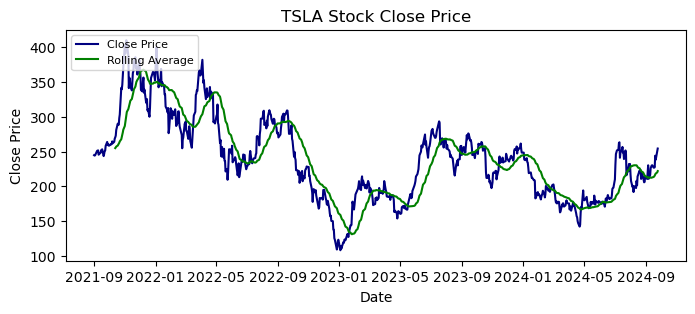

In [106]:
# Plot a rolling average of the Close price to highlight long-term trends
roll_avg = tsla.rolling(window=30).mean()
plt.figure(figsize=(8, 3))
plt.title('TSLA Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(tsla, label='Close Price', color='navy')
plt.plot(roll_avg, label='Rolling Average', color='green')
plt.legend(loc='upper left',fontsize=8)



### 2.2. Predict Using a Linear Model
**Task:** Build and evaluate a linear regression model to predict future stock prices.

In [107]:
# Prepare the data

tsla_original.reset_index(inplace=True)
tsla_original['time']= range(1, len(tsla_original)+1)
y = tsla_original['Close']  # Response variable: Close prices
time = tsla_original['time']  # Predictor variable: Time
X = sm.add_constant(time)

# Train model using whole dataset not spliting dataset
ols_fit = sm.OLS(y, X).fit()
# Build the linear regression model


In [110]:
# Fit the model to the Close price and predict future prices
b0 = ols_fit.params.const
b1 = ols_fit.params.time

print(f"The value of b0 is {b0}")
print(f"The value of b1 is {b1}")


The value of b0 is 298.6487540772635
The value of b1 is -0.15605184924493662


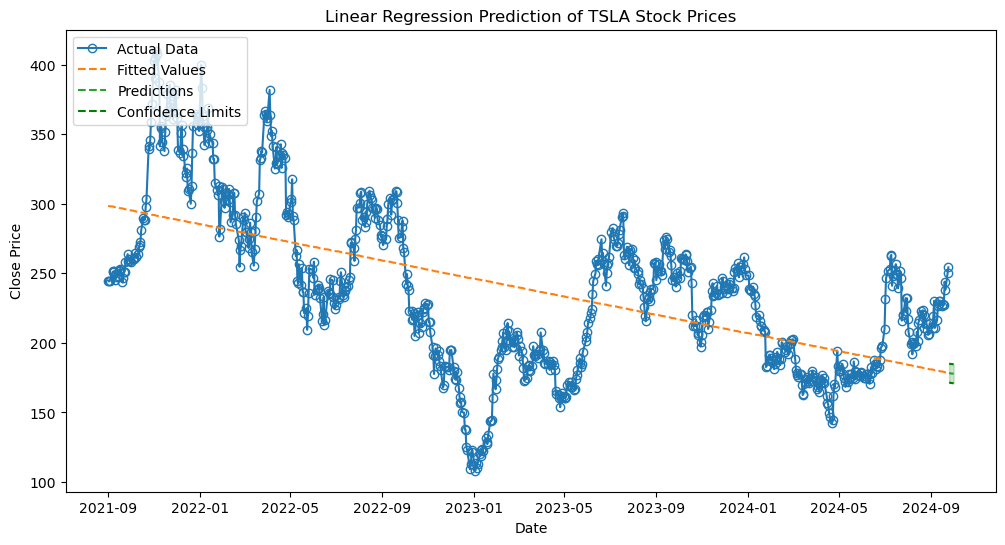

In [123]:
# Predict future stock prices
future = [1, 2, 3, 4, 5]  # Future time steps to predict
n = len(tsla_original)  # Number of observations

# Significance Level => Confidence intervals 95%
alpha = 0.05

# Calculate the inverse of X'X
X_tX_inv = np.linalg.inv(X.T.dot(X))

# Calculate the variance of the residuals
s2 = np.sum(np.square(y - b0 - b1 * time)) / (n - 2)

t_val = t.ppf(1 - alpha / 2, df=n - 2)

predict_vals = []
upper_limit = []
lower_limit = []

for l in future:
    future_time = n + l  # Future time value
    predict_val = b0 + b1 * future_time

    # Variance factor for confidence intervals
    x = np.array([[1], [future_time]])
    variance_factor = np.sqrt(x.T.dot(X_tX_inv).dot(x))
    limit = t_val * np.sqrt(s2) * variance_factor[0][0]

    predict_vals.append(predict_val)
    upper_limit.append(predict_val + limit)
    lower_limit.append(predict_val - limit)

# Create a DataFrame for predictions
last_date = tsla_original['Date'].iloc[-1]
start_date = last_date + pd.Timedelta(days=1)
future_dates = pd.date_range(start=start_date, periods=len(future), freq='B')  # 'B' for business days

pred_data = {
    'pred': predict_vals,
    'ul': upper_limit,
    'll': lower_limit
}
pred_df = pd.DataFrame(pred_data, index=future_dates)

# Fitted values for existing data
fitted_val = b0 + b1 * time

# Plot the results
fig = plt.figure(figsize=(12, 6))
fig.set_facecolor('white')

# Plot actual data
plt.plot(tsla_original['Date'], tsla_original['Close'], label='Actual Data', marker='o', markerfacecolor='none')

# Plot fitted values
plt.plot(tsla_original['Date'], fitted_val, label='Fitted Values', linestyle='--')

# Plot predictions
plt.plot(pred_df.index, pred_df['pred'], label='Predictions', linestyle='--')

# Plot confidence intervals
plt.plot(pred_df.index, pred_df['ll'], color='green', linestyle='--', label='Confidence Limits')
plt.plot(pred_df.index, pred_df['ul'], color='green', linestyle='--')

# Fill between confidence intervals
plt.fill_between(pred_df.index, pred_df['ll'], pred_df['ul'], color='green', alpha=0.2)

plt.legend(loc='upper left')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title('Linear Regression Prediction of TSLA Stock Prices')
plt.show()

### 2.3. Predict Using a Quadratic Model
**Task:** Build and evaluate a quadratic regression model to predict future stock prices.

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Extend the linear model to quadratic by including a Time^2 term
# Fit the quadratic model
tsla_original['time_squared'] = tsla_original['time'] ** 2  # Create Time^2 variable
X_quad = tsla_original[['time', 'time_squared']]
X_quad = sm.add_constant(X_quad)

# Train model using whole dataset not spliting dataset
quad_fit = sm.OLS(y, X_quad).fit()
b0_quad = quad_fit.params.const
b1_quad = quad_fit.params.time
b2_quad = quad_fit.params.time_squared

print("Quadratic Model Coefficients:")
print(f"Intercept (b0): {b0_quad}")
print(f"Slope (b1): {b1_quad}")
print(f"Quadratic Term (b2): {b2_quad}\n")

# Number of observations
n = len(tsla_original)

# Significance Level => Confidence intervals 95%
alpha = 0.05
t_val_linear = t.ppf(1 - alpha / 2, df=n - 2)
t_val_quad = t.ppf(1 - alpha / 2, df=n - 3)
# Build the quadratic model


Quadratic Model Coefficients:
Intercept (b0): 338.4880636676301
Slope (b1): -0.4656837890663928
Quadratic Term (b2): 0.0004015978467204607



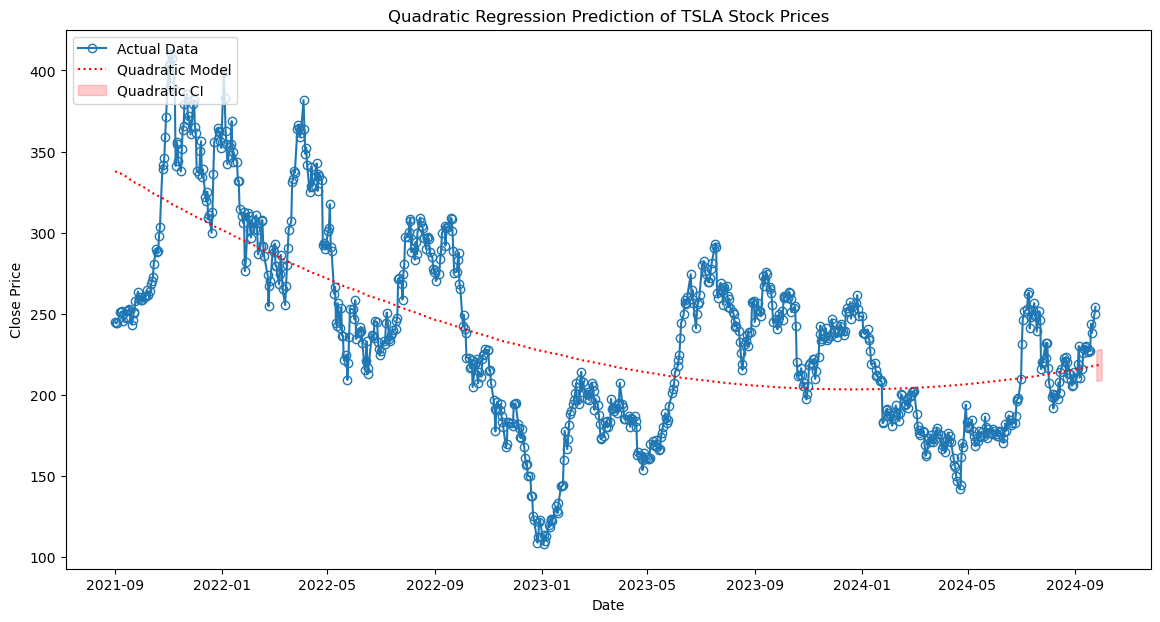

In [124]:
# Fit the model to the Close price and predict future prices

# Calculate the inverse of X'X for quadratic model
X_tX_inv_quad = np.linalg.inv(X_quad.T.dot(X_quad))

# Variance of residuals for quadratic model
s2_quad = np.sum(np.square(y - b0_quad - b1_quad * tsla_original['time'] - b2_quad * tsla_original['time_squared'])) / (n - 3)
# Quadratic Model Predictions
predict_vals_quad = []
upper_limit_quad = []
lower_limit_quad = []

for l in future:
    future_time = n + l
    future_time_squared = future_time ** 2
    predict_val_quad = b0_quad + b1_quad * future_time + b2_quad * future_time_squared

    # Variance factor for confidence intervals
    x_quad = np.array([1, future_time, future_time_squared])
    variance_factor_quad = np.sqrt(x_quad.T.dot(X_tX_inv_quad).dot(x_quad))
    limit_quad = t_val_quad * np.sqrt(s2_quad) * variance_factor_quad

    predict_vals_quad.append(predict_val_quad)
    upper_limit_quad.append(predict_val_quad + limit_quad)
    lower_limit_quad.append(predict_val_quad - limit_quad)


# Quadratic Model Predictions DataFrame
pred_data_quad = {
    'pred': predict_vals_quad,
    'ul': upper_limit_quad,
    'll': lower_limit_quad
}
pred_df_quad = pd.DataFrame(pred_data_quad, index=future_dates)

fitted_val_quad = b0_quad + b1_quad * tsla_original['time'] + b2_quad * tsla_original['time_squared']
vals_quad = pd.concat([fitted_val_quad, pred_df_quad['pred']])



# Plot the data and model predictions
fig = plt.figure(figsize=(14, 7))
fig.set_facecolor('white')

# Plot actual data
plt.plot(tsla_original['Date'], tsla_original['Close'], label='Actual Data', marker='o', markerfacecolor='none')

# Convert pred_df_quad.index to a Series with a name
dates_series = pd.Series(pred_df_quad.index, name='Date')

# Concatenate tsla_original['Date'] with dates_series
all_dates = pd.concat([tsla_original['Date'], dates_series])

# Plot quadratic model fitted values and predictions
plt.plot(all_dates, vals_quad, label='Quadratic Model', linestyle=':', color='red')

# Plot confidence intervals for quadratic model
plt.fill_between(pred_df_quad.index, pred_df_quad['ll'], pred_df_quad['ul'], color='red', alpha=0.2, label='Quadratic CI')

plt.legend(loc='upper left')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title('Quadratic Regression Prediction of TSLA Stock Prices')
plt.show()



### 2.4. Model Estimation Using Error Metrics

In [130]:
# Use mean_absolute_error and mean_squared_error to evaluate both models.
#linear_fit = sm.OLS(y, X_linear).fit()


# Evaluate models using MAE and MSE
mae_linear = mean_absolute_error(y, fitted_val)
mse_linear = mean_squared_error(y, fitted_val)
mae_quad = mean_absolute_error(y, fitted_val_quad)
mse_quad = mean_squared_error(y, fitted_val_quad)


# Compare the performance of the linear and quadratic models based on the errors.
print(f"MAE Linear : {mae_linear : .2f}")
print(f"MSE Linear : {mse_linear: .2f}  ")
print("------------------------------------")
print(f"MAE Quadratic : {mae_quad:.2f}")
print(f"MSE Quadratic : {mse_quad:.2f}")

MAE Linear :  39.80
MSE Linear :  2288.59  
------------------------------------
MAE Quadratic : 37.47
MSE Quadratic : 1973.62
